In [1]:
import sys
import os
os.chdir('..')

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from module import Module
from linear import Linear
from optimizer import SGD
from loss import CrossEntropyLoss, MSE
from activation import ReLU, Softmax
from dataset import MNIST
from dataloader import DataLoader
from transforms import Compose, ToTensor, Normalize, Standardize
from tensor import Tensor

In [3]:
# -- using our implemented dataset module
transformation=Compose([ToTensor(), Standardize()])
train_data = MNIST(root='data/', train=True, download=True,transform=transformation)
test_data = MNIST(root='data/', train=False, download=True,transform=transformation)

# -- using our implemented dataloader module
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=True)

 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
>>> applying ToTensor()...
 :O already a tensor
>>> applying Standardize(inplace=True)...
>>> [ToTensor(), Standardize(inplace=True)] applied successfully <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> da

In [4]:
# -- model definition
class Model(Module):
    def __init__(self):
        super().__init__()
        self.linear1 = Linear(28*28,20)
        self.relu=ReLU()
        self.linear2 = Linear(20, 10)
        self.softmax=Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return self.softmax(x)
    
model = Model()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = CrossEntropyLoss()

In [ ]:
accuracies = []

# -- running the experiment 10 times
for run in range(10):
    print(f"Run {run + 1} / 10:")
    
    # -- training loop
    for epoch in range(1):  # You can adjust the number of epochs as needed
        for batch_no, (x, y) in enumerate(train_loader):
            # -> flatten the batch (32, 1, 28, 28) to (784, 32)
            x = x.flatten_batch()  # (784, 32)

            optimizer.zero_grad()
            y_hat = model(x)
            loss = loss_fn(y, y_hat)
            loss.backward()
            optimizer.step()
    # -- testing
    correct = 0
    total = 0

    for batch_no, (x, y) in enumerate(test_loader):
        x = x.flatten_batch()
        y_hat = model(x)
        predictions = np.argmax(y_hat, axis=0)
        correct += np.sum(predictions == y)
        total += y.data.size
    
    accuracy = correct / total * 100
    accuracies.append(accuracy)
    
    print(f'Accuracy for run {run + 1}: {accuracy:.2f}%')
    print('------------------')

Run 1 / 10:
Accuracy for run 1: 95.23%
------------------
Run 2 / 10:
Accuracy for run 2: 94.83%
------------------
Run 3 / 10:
Accuracy for run 3: 95.04%
------------------
Run 4 / 10:
Accuracy for run 4: 95.38%
------------------
Run 5 / 10:
Accuracy for run 5: 94.98%
------------------
Run 6 / 10:
Accuracy for run 6: 94.91%
------------------
Run 7 / 10:
Accuracy for run 7: 95.22%
------------------
Run 8 / 10:
Accuracy for run 8: 95.18%
------------------
Run 9 / 10:
Accuracy for run 9: 95.09%
------------------
Run 10 / 10:
Accuracy for run 10: 94.88%
------------------


In [11]:
from termcolor import colored
import numpy as np  # Ensure numpy is imported if you're using np.argmax

train_accuracies = []  
test_accuracies = []   

# -- running the experiment 10 times
for run in range(10):
    print(colored(f"{'='*10} Run {run + 1} / 10 {'='*10}", 'cyan', attrs=['bold']))
    
    # -- training loop
    correct_train = 0
    total_train = 0
    for epoch in range(1):  # You can adjust the number of epochs as needed
        for batch_no, (x, y) in enumerate(train_loader):
            # -> flatten the batch (32, 1, 28, 28) to (784, 32)
            x = x.flatten_batch()  # (784, 32)

            optimizer.zero_grad()
            y_hat = model(x)
            loss = loss_fn(y, y_hat)
            loss.backward()
            optimizer.step()
            
            
            predictions = np.argmax(y_hat, axis=0)
            correct_train += np.sum(predictions == y)
            total_train += y.data.size
    
    train_accuracy = correct_train / total_train * 100
    train_accuracies.append(train_accuracy)
    print(colored(f"🎯 Training Accuracy: {train_accuracy:.2f}%", 'green'))

    # -- testing loop
    correct_test = 0
    total_test = 0
    for batch_no, (x, y) in enumerate(test_loader):
        x = x.flatten_batch()
        y_hat = model(x)
        predictions = np.argmax(y_hat, axis=0)
        correct_test += np.sum(predictions == y)
        total_test += y.data.size
    
    test_accuracy = correct_test / total_test * 100
    test_accuracies.append(test_accuracy)
    print(colored(f"🔍 Testing Accuracy: {test_accuracy:.2f}%", 'yellow'))
    print(colored('-'*30, 'magenta'))

print(colored(f"\n{'='*15} Summary of Results {'='*15}", 'blue', attrs=['bold']))
for i in range(10):
    print(colored(f"Run {i + 1} - 🏋️ Training: {train_accuracies[i]:.2f}% | 🧪 Testing: {test_accuracies[i]:.2f}%", 'white'))
print(colored(f"{'='*50}", 'blue', attrs=['bold']))


ModuleNotFoundError: No module named 'termcolor'

In [7]:
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy over 10 runs: {average_accuracy:.2f}%')

Average Accuracy over 10 runs: 95.07%


## PyTorch

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = datasets.MNIST('data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

model = nn.Sequential(nn.Linear(28*28, 20), nn.ReLU(), nn.Linear(20, 10), nn.Softmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

# List to store accuracies from each run
pytorch_accuracies = []

# Run the experiment 10 times
for run in range(10):
    print(f"Run {run + 1} / 10:")
    
    # -- training loop
    for epoch in range(1):  # You can adjust the number of epochs as needed
        for batch_no, (x, y) in enumerate(trainloader):
            x = x.view(x.shape[0], -1)
            optimizer.zero_grad()
            y_hat = model(x)
            loss = loss_fn(y_hat, y)
            loss.backward()
            optimizer.step()
    
    # -- testing
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation during testing
        for batch_no, (x, y) in enumerate(testloader):
            x = x.view(x.shape[0], -1)
            y_hat = model(x)
            predictions = torch.argmax(y_hat, dim=1)
            correct += torch.sum(predictions == y)
            total += y.size(0)
    
    accuracy = correct / total * 100
    pytorch_accuracies.append(accuracy)
    
    print(f'Pytorch Accuracy for run {run + 1}: {accuracy:.2f}%')
    print('------------------')

Run 1 / 10:
Pytorch Accuracy for run 1: 76.02%
------------------
Run 2 / 10:
Pytorch Accuracy for run 2: 85.06%
------------------
Run 3 / 10:
Pytorch Accuracy for run 3: 85.46%
------------------
Run 4 / 10:
Pytorch Accuracy for run 4: 91.65%
------------------
Run 5 / 10:
Pytorch Accuracy for run 5: 92.75%
------------------
Run 6 / 10:
Pytorch Accuracy for run 6: 93.35%
------------------
Run 7 / 10:
Pytorch Accuracy for run 7: 93.18%
------------------
Run 8 / 10:
Pytorch Accuracy for run 8: 93.96%
------------------
Run 9 / 10:
Pytorch Accuracy for run 9: 94.25%
------------------
Run 10 / 10:
Pytorch Accuracy for run 10: 93.75%
------------------


In [9]:
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy over 10 runs: {average_accuracy:.2f}%')

Average Accuracy over 10 runs: 95.07%


## Comparisons

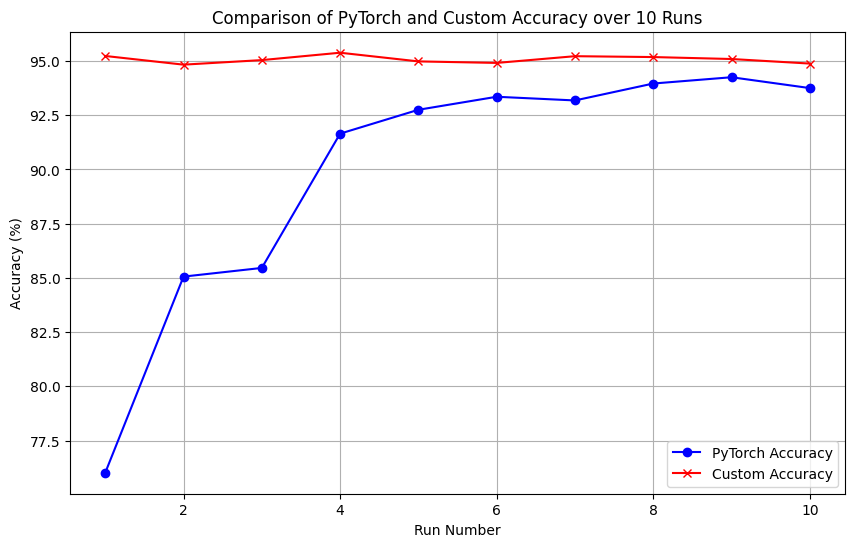

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pytorch_accuracies, label='PyTorch Accuracy', marker='o', color='blue')
plt.plot(range(1, 11), accuracies, label='Custom Accuracy', marker='x', color='red')

plt.xlabel('Run Number')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of PyTorch and Custom Accuracy over 10 Runs')
plt.legend()
plt.grid(True)
plt.show()